# Graph coloring using backtracking and approximation 

For a simple, connected, planar graph with v vertices and e edges and f faces, the following simple conditions hold for v ≥ 3:


*   List item
*   List item


Theorem 1. e ≤ 3v − 6;

# importing libs

In [ ]:
!pip install planarity
import random as rd
import planarity # cheching planarity 
import networkx as nx # drawing graph
import matplotlib.pyplot as plt # drawing helper

# Random Planar graph generation 


In [ ]:
### LAST VERSION  
def pGraphGenerator(vert,iter):
  #import planarity
  #import random as rd
  vertices = vert
  iterations = iter
  listOfGraphs = []
  for r in range(iter):
    availEdges = 3*vertices - 6 # Avilable edges, based on theorem_1
    maxDegree = vertices -1 #Prevent self-loop
    graphEdges = [] # list of tuples 
    #adding (i,j) edges to the empty graphs if it's possible
    for i in range(0,vertices):
      # rnd = random number for number of edges that node_i can have at most
      rnd = rd.randint(0, maxDegree)
      # Checking theorem1 and updating availEdges
      if (rnd > availEdges):
        if (availEdges == 0):
          break
        else:
          rnd = availEdges
      availEdges -= rnd
      # generating nodes and checking planarity:
      # candidates list 
      cand = rd.sample(list(range(0,i))+list(range(i+1,vertices)),rnd)
      #if (i,canditade[j]) doesn't change planarity, we add it to the graph 
      for j in cand:
        #Preventing parralel edge:
        if ( ( (i,j) in graphEdges ) or ( (j,i) in graphEdges ) ):
          pass # do nothing
        else:
          graphEdges.append( (i,j) )
          if (not planarity.is_planar(graphEdges)):
            graphEdges.pop()
            # updating availEdges(we can even skip, and let it be sparse)
            # availEdges +=1

    listOfGraphs.append(graphEdges)

  return listOfGraphs

# Minumum number of color 

Note: unfortunately GeeksForGeeks code is wrong

In [ ]:
''' ref : GeeksForGeeks'''
'''https://www.geeksforgeeks.org/minimum-number-of-colors-required-to-color-a-graph/'''
# This code is contributed by mohit kumar 29
# Python3 program to find the minimum
# number of colors needed to color
# the graph
from collections import deque

# Function to count the minimum
# number of color required
def minimumColors(N, E, U, V):

	# Create array of vectors
	# to make adjacency list
	adj = [[] for i in range(N)]

	# Intialise colors array to 1
	# and count array to 0
	count = [0]*N
	colors = [1]*(N)

	# Create adjacency list of
	# a graph
	for i in range(N):
		adj[V[i] - 1].append(U[i] - 1)
		count[U[i] - 1] += 1

	# Declare queue Q
	Q = deque()

	# Traverse count[] and insert
	# in Q if count[i] = 0
	for i in range(N):
		if (count[i] == 0):
			Q.append(i)

	# Traverse queue and update
	# the count of colors
	# adjacent node
	while len(Q) > 0:
		u = Q.popleft()

		# Traverse node u
		for x in adj[u]:
			count[x] -= 1

			# If count[x] = 0
			# insert in Q
			if (count[x] == 0):
				Q.append(x)

			# If colors of child
			# node is less than
			# parent node, update
			# the count by 1
			if (colors[x] <= colors[u]):
				colors[x] = 1 + colors[u]

	# Stores the minimumColors
	# requires to color the graph.
	minColor = -1

	# Find the maximum of colors[]
	for i in range(N):
		minColor = max(minColor, colors[i])

	# Print the minimum no. of
	# colors required.
	return (minColor)




Why GeeksForGeeks.com's algorithm for finding minimum number of colors has a bug? 

You can test this following graph e and see the function returns 2 but actually we minimum number is 4.

graph = [(0, 4), (0, 2), (0, 3), (1, 3), (1, 2), (2, 3), (2, 4), (3, 4)]
This is a counterexample 




# Coloring maps using backtracking 

In [ ]:
# subroutines: 
def adjacencyBuild( edgeList , vertices ):
  # receive list of edges and return adj list of graph
  graph = [ [0]*vertices]*vertices
  for pair in edgeList:
    graph[pair[0]] = pair[1]
    graph[pair[1]] = pair[0] #adj matrix is symmetric

# coloring process 
def IsSafe(nodeNum, c ,graph, nodesColor):
  for endpointIndex,connected in enumerate(graph[nodenum]):
     if (connected == 1 and nodesColor[endpointIndex] == c):
       return False 

def coloring(nodeNum ,graph , colors, vertices , nodesColor):
  for c in range(0,colors):
    if (IsSafe(nodeNum , c ,graph, nodesColor)):
      nodesColor[nodeNum] = c
      if (nodeNum+1 < vertices):
        coloring(nodeNum+1,graph , colors, vertices, nodesColor)
      else:
        return

def graphColor( graph , colors, nodesColor):
  # graph = an N*N adjacency matrix (list of lists)
  # colors = number of colors that we have
  vertices = len(graph)
  coloring(0 ,graph , colors, vertices , nodesColor)
  # result has already reflected to nodesColor


# My approximation algorithms for graph coloring problem

I just want to quickly elaborate on my idea about approximation algorithms. Furture development would be implementing this psudocode with python.
The idea is to iterate over colors at first and in each iteration iterate over nodes such that at first we pick one color and try to paint all possible nodes (sorted by their priorities).And then after that we pick another color and paint all remaining nodes ,obviously those who are not adgacent, based on their priorities. 
Note: Priority of nodes is based on some heuristics like degree of node or other heuristics.

note2: Since this method is relied on the heursitecs that we use and starting node we might fail to find the answer 

For estimating robustness of this estimation we should compare it with backtracking algorithm

# Driver code 

In [ ]:
# Testing graph coloring function

In [ ]:
# helper function: 
def helper(g ,numOfVert ):
  N = numOfVert
  E = len(g)
  U, V = zip(*g) # unzipping g 
  return minimumColors(N, E, U, V)

#Driver code
NumberOfGraphs = 1
numOfVert = 50
graphs5Vert = pGraphGenerator(numOfVert,NumberOfGraphs)
graphs5VertMinCol = [ helper(g , numOfVert) for g in graphs5Vert]
#edgeList = []
#graph = adjacencyBuild(edgeList, numVertices)
##graphColor(graph , colors ,nodeColors) 

In [ ]:
print(graphs5VertMinCol)

[4]


[(0, 49), (0, 21), (0, 22), (0, 33), (0, 42), (0, 7), (0, 39), (0, 12), (0, 45), (0, 36), (0, 31), (0, 25), (0, 35), (0, 15), (0, 5), (0, 4), (0, 19), (0, 8), (0, 28), (0, 1), (0, 30), (0, 32), (0, 9), (0, 46), (1, 41), (1, 6), (1, 15), (1, 25), (1, 46), (2, 30), (2, 47), (2, 39), (2, 32), (2, 22), (2, 25), (2, 26), (3, 18), (3, 24), (3, 33), (3, 31), (3, 1), (3, 8), (3, 35), (3, 41), (3, 44), (3, 17), (3, 0), (3, 6), (3, 30), (3, 49), (3, 38), (3, 46), (3, 21), (3, 25), (3, 43), (3, 20), (3, 27), (3, 7), (3, 47), (3, 23), (3, 36), (3, 5), (3, 12), (3, 14), (3, 29), (3, 42), (4, 11), (4, 18), (4, 13), (4, 8), (4, 21), (4, 14), (4, 28), (4, 40), (4, 19), (4, 48), (4, 23), (4, 16), (4, 3), (4, 9), (4, 29), (4, 34), (4, 38), (4, 24), (4, 37), (4, 17), (4, 20), (4, 27), (5, 12), (5, 31), (5, 43), (5, 10)]


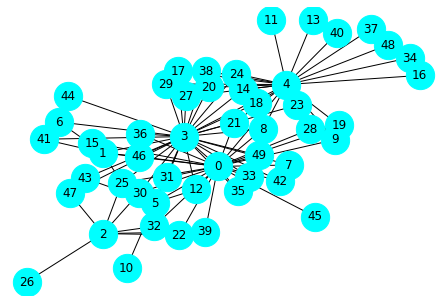

In [ ]:
def draw(edgess,i,Nodesname):
  g = nx.Graph()
  g.add_nodes_from(Nodesname)
  g.add_edges_from(edgess) 
  nx.draw(g, node_size = 800, node_color="cyan", with_labels = True)
  plt.show()

for index,g in enumerate(graphs5Vert):
  print(g)
  draw(g,index,[i for i in range(numOfVert)])
  print("")
